<a href="https://colab.research.google.com/github/ValeriaLS/Challenge1_AluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [57]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



##1.1. Calcular el ingreso total de cada tienda.

In [58]:
suma_total_precio1 = tienda["Precio"].sum()
suma_total_precio2 = tienda2["Precio"].sum()
suma_total_precio3 = tienda3["Precio"].sum()
suma_total_precio4 = tienda4["Precio"].sum()



In [59]:
print(f'El ingreso total de la tienda 1 es: ${suma_total_precio1}')
print(f'El ingreso total de la tienda 2 es: ${suma_total_precio2}')
print(f'El ingreso total de la tienda 3 es: ${suma_total_precio3}')
print(f'El ingreso total de la tienda 4 es: ${suma_total_precio4}')


El ingreso total de la tienda 1 es: $1150880400.0
El ingreso total de la tienda 2 es: $1116343500.0
El ingreso total de la tienda 3 es: $1098019600.0
El ingreso total de la tienda 4 es: $1038375700.0


# 2. Ventas por categoría

##2.1 Calcular la cantidad de productos vendidos por categoría en cada tienda.

In [60]:
vpc_tienda1 = tienda['Categoría del Producto'].value_counts()
vpc_tienda2 = tienda2['Categoría del Producto'].value_counts()
vpc_tienda3 = tienda3['Categoría del Producto'].value_counts()
vpc_tienda4 = tienda4['Categoría del Producto'].value_counts()

In [61]:
print(vpc_tienda1)

Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64


In [62]:
ventas_por_categoria = tienda.groupby('Categoría del Producto')[['Precio']].sum().sort_values('Precio', ascending=False)
ventas_por_categoria2 = tienda2.groupby('Categoría del Producto')[['Precio']].sum().sort_values('Precio', ascending=False)
ventas_por_categoria3 = tienda3.groupby('Categoría del Producto')[['Precio']].sum().sort_values('Precio', ascending=False)
ventas_por_categoria4 = tienda4.groupby('Categoría del Producto')[['Precio']].sum().sort_values('Precio', ascending=False)

In [63]:
print(ventas_por_categoria)

                              Precio
Categoría del Producto              
Electrónicos             429493500.0
Electrodomésticos        363685200.0
Muebles                  187633700.0
Instrumentos musicales    91299000.0
Deportes y diversión      39290000.0
Juguetes                  17995700.0
Artículos para el hogar   12698400.0
Libros                     8784900.0


# 3. Calificación promedio de la tienda


##3.1 Calcular las calificaciones promedio de los clientes para cada tienda.

In [64]:
def clasificacion_promedio(tienda, numero):
    promedio = tienda['Calificación'].mean()
    print(f"Clasificación promedio en Tienda {numero}: {promedio:.2f}")

# Mostrar resultados para cada tienda
clasificacion_promedio(tienda, 1)
clasificacion_promedio(tienda2, 2)
clasificacion_promedio(tienda3, 3)
clasificacion_promedio(tienda4, 4)

Clasificación promedio en Tienda 1: 3.98
Clasificación promedio en Tienda 2: 4.04
Clasificación promedio en Tienda 3: 4.05
Clasificación promedio en Tienda 4: 4.00


# 4. Productos más y menos vendidos

##4.1 Identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda.

In [65]:
urls = [
"https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
"https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
"https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
"https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

]
# pd.read_csv lee directamente la URL. .assign agrega la columna 'Tienda'
df_total = pd.concat(
    [pd.read_csv(url).assign(Tienda=f"Tienda {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
)

# 2. Preparación de Datos
# Convertir a datetime la columna de fecha (buena práctica para el futuro)
df_total['Fecha de Compra'] = pd.to_datetime(df_total['Fecha de Compra'])

# Renombramos y tipamos si es necesario (asumiendo que la lectura ya lo hizo correctamente)
# Si 'Precio' y 'Cantidad de cuotas' son cargados correctamente desde el CSV,
# estas líneas son a menudo redundantes, pero las mantenemos por seguridad.
df_total['Precio'] = df_total['Precio'].astype(float)

# 3. Cálculo de Ingresos y Ventas Agrupadas
# Si tienes una columna 'Cantidad' en tus CSVs, DEBERÍAS usar df_total['Cantidad'] * df_total['Precio'].
# Aquí, asumimos que 'Precio' ya representa el total de la transacción unitaria.
ventas = df_total.groupby(['Tienda', 'Producto'])['Precio'].sum().reset_index(name='Ingresos_Totales')

# 4. Función de Análisis (Más concisa y usando los métodos de pandas)
def analizar_tienda(tienda_df, tienda_nombre):
    """Muestra el TOP 3 de productos que más y menos ingresos generaron para una tienda."""

    # Ordenar por ingresos totales
    ordenado = tienda_df.sort_values(by='Ingresos_Totales', ascending=False)

    # TOP MÁS VENDIDOS (Método .to_string() para formato de salida limpio)
    print(f"\n{tienda_nombre} - TOP 3 productos que MÁS dinero generaron:")
    print(ordenado.head(3).to_string(
        index=False, columns=['Producto', 'Ingresos_Totales'],
        formatters={'Ingresos_Totales': '${:,.2f}'.format}
    ))

    print(f"\n{tienda_nombre} - TOP 3 productos que MENOS dinero generaron:")
    # TOP MENOS VENDIDOS (Ordenamos de forma ascendente y tomamos los primeros 3)
    print(ordenado.tail(3).to_string(
        index=False, columns=['Producto', 'Ingresos_Totales'],
        formatters={'Ingresos_Totales': '${:,.2f}'.format}
    ))

# 5. Iterar y Analizar
for tienda_nombre in ventas['Tienda'].unique():
    # Filtramos UNA SOLA VEZ antes de llamar a la función
    data_tienda = ventas[ventas['Tienda'] == tienda_nombre]
    analizar_tienda(data_tienda, tienda_nombre)


Tienda 1 - TOP 3 productos que MÁS dinero generaron:
     Producto Ingresos_Totales
TV LED UHD 4K  $142,150,200.00
 Refrigerador  $112,143,300.00
    Iphone 15   $97,902,200.00

Tienda 1 - TOP 3 productos que MENOS dinero generaron:
          Producto Ingresos_Totales
   Cubo mágico 8x8      $696,900.00
    Dinosaurio Rex      $688,900.00
Cuerda para saltar      $652,800.00

Tienda 2 - TOP 3 productos que MÁS dinero generaron:
     Producto Ingresos_Totales
    Iphone 15  $113,225,800.00
TV LED UHD 4K  $103,375,000.00
 Refrigerador   $97,632,500.00

Tienda 2 - TOP 3 productos que MENOS dinero generaron:
          Producto Ingresos_Totales
Cuerda para saltar      $856,900.00
    Dinosaurio Rex      $770,300.00
   Cubo mágico 8x8      $643,600.00

Tienda 3 - TOP 3 productos que MÁS dinero generaron:
     Producto Ingresos_Totales
 Refrigerador   $99,889,700.00
TV LED UHD 4K   $96,669,100.00
    Iphone 15   $93,225,700.00

Tienda 3 - TOP 3 productos que MENOS dinero generaron:
          

/tmp/ipython-input-3029151194.py:16: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_total['Fecha de Compra'] = pd.to_datetime(df_total['Fecha de Compra'])


# 5. Envío promedio por tienda

In [66]:
# Asegurar que el costo de envío es numérico
df_total['Costo de envío'] = df_total['Costo de envío'].astype(float)

# Agrupar por tienda y calcular el promedio del costo de envío
envio_promedio = df_total.groupby('Tienda')['Costo de envío'].mean()

# Mostrar resultados
print("\nEnvío promedio por tienda:")
for tienda, promedio in envio_promedio.items():
    print(f"{tienda}: ${promedio:.2f}")


Envío promedio por tienda:
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


#6. Visualizacion

In [67]:
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

df_total = pd.concat(
    [pd.read_csv(url).assign(Tienda_ID=f"Tienda {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
)

df_total['Fecha de Compra'] = pd.to_datetime(df_total['Fecha de Compra'], dayfirst=True)

df_total.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Producto                9435 non-null   object        
 1   Categoría del Producto  9435 non-null   object        
 2   Precio                  9435 non-null   float64       
 3   Costo de envío          9435 non-null   float64       
 4   Fecha de Compra         9435 non-null   datetime64[ns]
 5   Vendedor                9435 non-null   object        
 6   Lugar de Compra         9435 non-null   object        
 7   Calificación            9435 non-null   int64         
 8   Método de pago          9435 non-null   object        
 9   Cantidad de cuotas      9435 non-null   int64         
 10  lat                     9435 non-null   float64       
 11  lon                     9435 non-null   float64       
 12  Tienda_ID               9435 non-null   object  

#7. Graficos

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

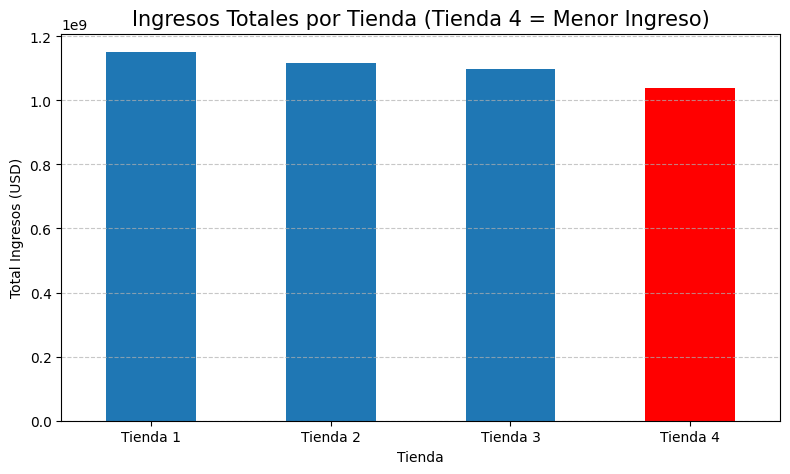

In [70]:
#1. Agrupar datos (se asume que df_total, ingresos_totales ya están calculados)
ingresos_totales = df_total.groupby('Tienda_ID')['Precio'].sum()

# 2. Definimos los colores: Rojo para la Tienda 4 (la de menor rendimiento)
colores = ['#1f77b4', '#1f77b4', '#1f77b4', 'red'] # Azul, Azul, Azul, Rojo

plt.figure(figsize=(8,5))
# Usamos el parámetro 'color' para aplicar la paleta
ingresos_totales.plot(kind='bar', color=colores)

plt.title('Ingresos Totales por Tienda (Tienda 4 = Menor Ingreso)', fontsize=15)
plt.ylabel('Total Ingresos (USD)')
plt.xlabel('Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0) # Mantenemos la etiqueta de la tienda horizontal
plt.tight_layout()
plt.show()

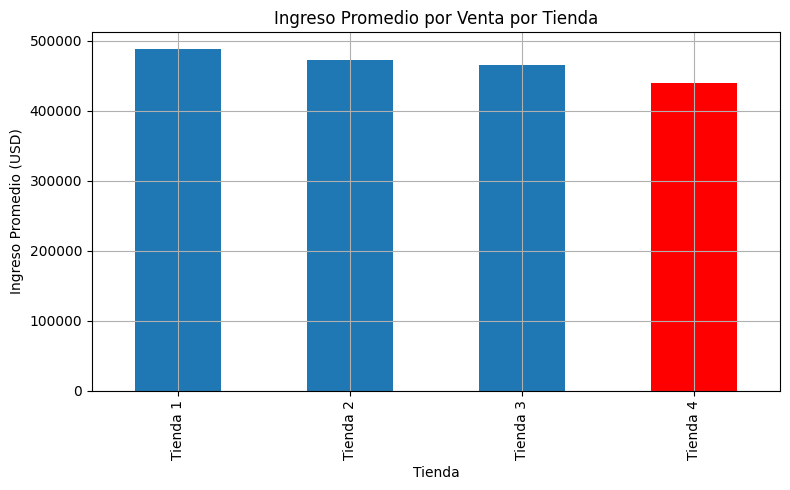

In [71]:
# 2. Línea: Promedio de ingreso por venta
ingreso_promedio = df_total.groupby('Tienda_ID')['Precio'].mean()

plt.figure(figsize=(8,5))
ingreso_promedio.plot(kind='bar', color=colores)
plt.title('Ingreso Promedio por Venta por Tienda')
plt.ylabel('Ingreso Promedio (USD)')
plt.xlabel('Tienda')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1577660870.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_total, x='Calificación', y='Costo de envío', palette='pastel')


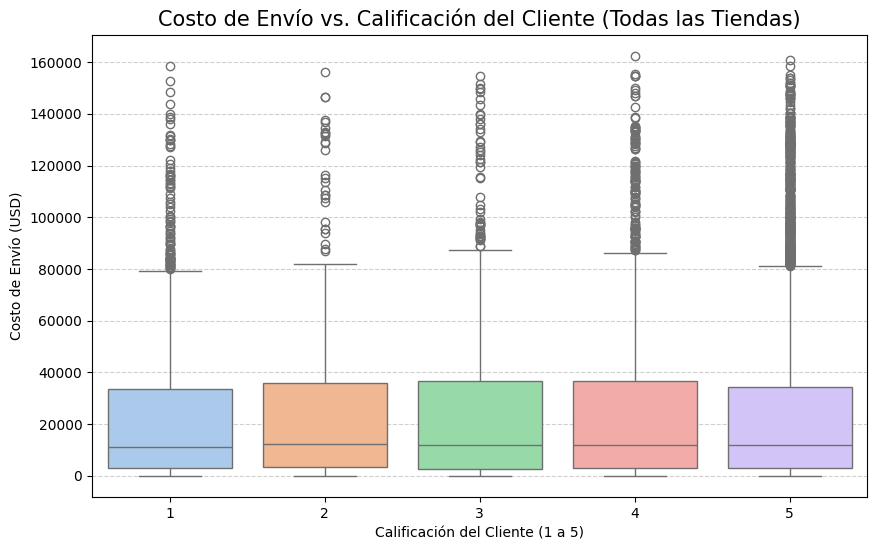

In [72]:
plt.figure(figsize=(10, 6))
# Boxplot: Comparamos la distribución de Calificaciones
sns.boxplot(data=df_total, x='Calificación', y='Costo de envío', palette='pastel')

plt.title('Costo de Envío vs. Calificación del Cliente (Todas las Tiendas)', fontsize=15)
plt.xlabel('Calificación del Cliente (1 a 5)')
plt.ylabel('Costo de Envío (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

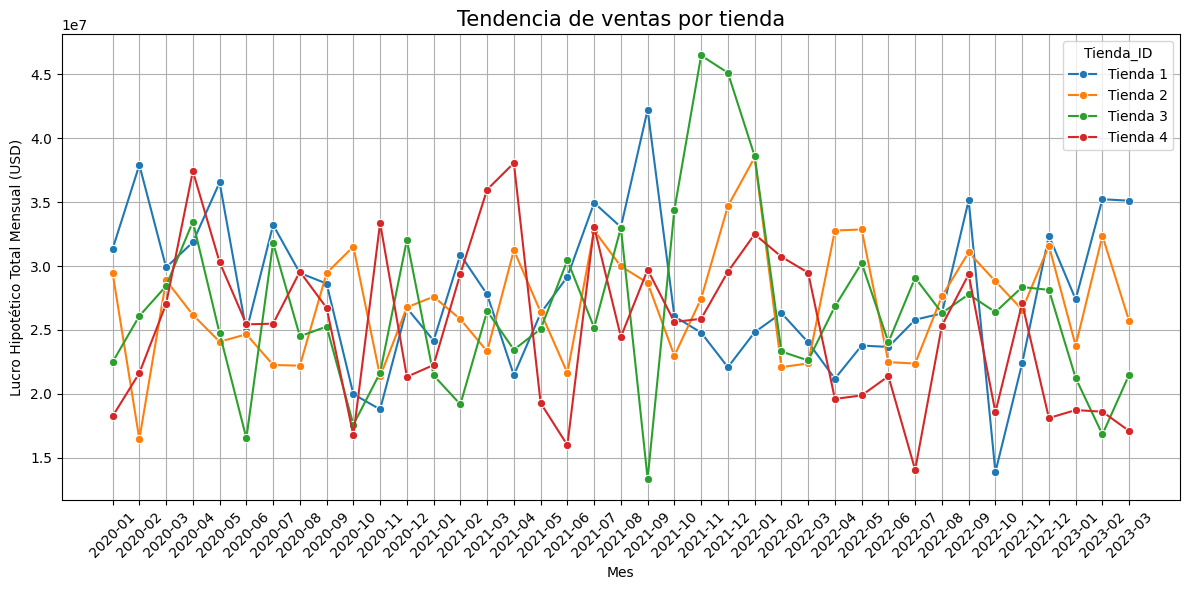

In [73]:
# 1. Aseguramos que la columna 'Fecha de Compra' sea datetime (¡crucial!)
df_total['Fecha de Compra'] = pd.to_datetime(df_total['Fecha de Compra'], dayfirst=True)

# Aseguramos que 'Lucro_Hipotetico' exista antes de usarlo
df_total['Lucro_Hipotetico'] = df_total['Precio'] - df_total['Costo de envío']

# 2. Agrupamos por Mes y por Tienda, sumando el Lucro Hipotético
lucro_mensual = df_total.groupby([
    df_total['Fecha de Compra'].dt.to_period('M'), # Agrupación por mes
    'Tienda_ID' # Usamos 'Tienda_ID' en lugar de 'Tienda'
])['Lucro_Hipotetico'].sum().reset_index()

# Calculate monthly sales for each store (needed for subsequent plots)
ventas_mensuales = df_total.groupby(
    [df_total['Fecha de Compra'].dt.to_period('M'), 'Tienda_ID']
)['Precio'].sum().reset_index()

ventas_mensuales.columns = ['Fecha', 'Tienda', 'Ingresos_Mensuales']
ventas_mensuales['Fecha'] = ventas_mensuales['Fecha'].dt.to_timestamp()
ventas_mensuales = ventas_mensuales.set_index('Fecha')

# 3. Convertimos el periodo de lucro_mensual a string para graficar
lucro_mensual['Fecha de Compra'] = lucro_mensual['Fecha de Compra'].astype(str)

# 4. Graficamos la serie temporal
plt.figure(figsize=(12, 6))
# Usamos 'hue='Tienda_ID'' para que cada tienda sea una línea diferente
sns.lineplot(data=lucro_mensual, x='Fecha de Compra', y='Lucro_Hipotetico', hue='Tienda_ID', marker='o')
plt.title('Tendencia de ventas por tienda', fontsize=15)
plt.ylabel('Lucro Hipotético Total Mensual (USD)')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

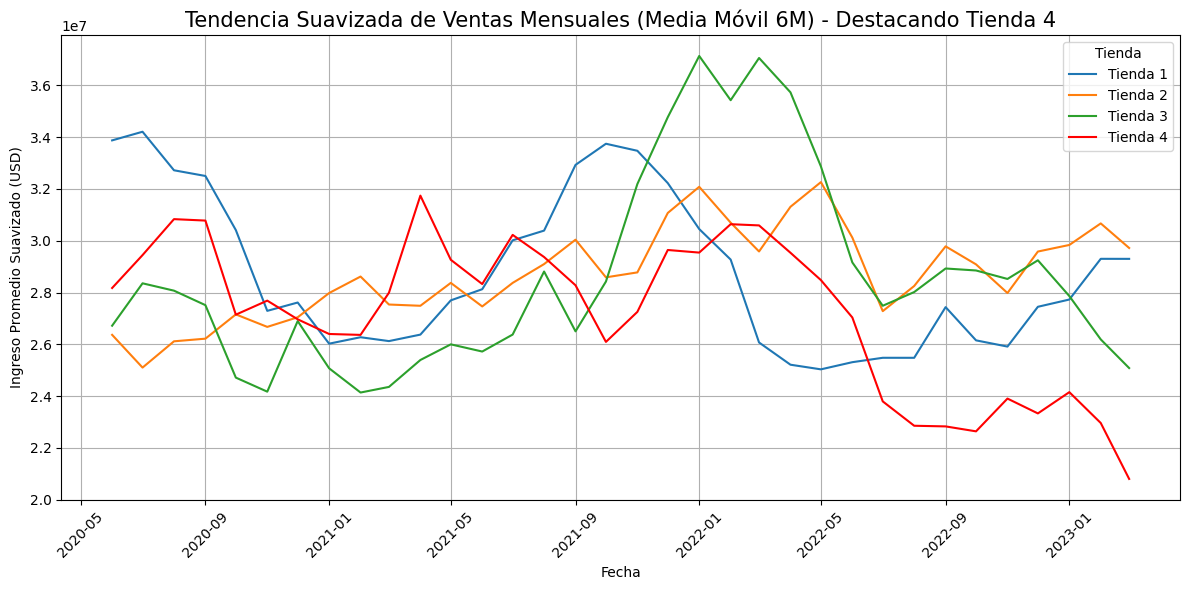

In [74]:
# 1. First, ensure 'Fecha de Compra' is a datetime object in df_total
df_total['Fecha de Compra'] = pd.to_datetime(df_total['Fecha de Compra'], dayfirst=True)

# Calculate monthly sales for each store
# Group by year-month and Tienda_ID, then sum the 'Precio'
ventas_mensuales = df_total.groupby(
    [df_total['Fecha de Compra'].dt.to_period('M'), 'Tienda_ID']
)['Precio'].sum().reset_index()

# Rename columns for clarity and to match the expected 'Tienda' column name in the original code
ventas_mensuales.columns = ['Fecha', 'Tienda', 'Ingresos_Mensuales']

# Convert the PeriodIndex to Timestamp for plotting
ventas_mensuales['Fecha'] = ventas_mensuales['Fecha'].dt.to_timestamp()
ventas_mensuales = ventas_mensuales.set_index('Fecha')

# 2. Definimos la paleta de colores para destacar la Tienda 4
# Mapeamos los colores a las tiendas: Tienda 4 debe ser roja
color_map = {'Tienda 1': '#1f77b4', 'Tienda 2': '#ff7f0e', 'Tienda 3': '#2ca02c', 'Tienda 4': 'red'}

plt.figure(figsize=(12, 6))

for tienda in ventas_mensuales['Tienda'].unique():
    data_tienda = ventas_mensuales[ventas_mensuales['Tienda'] == tienda].copy()
    data_tienda['Media_Movil_6M'] = data_tienda['Ingresos_Mensuales'].rolling(window=6).mean()

    # Graficamos, usando el color específico para la tienda
    sns.lineplot(data=data_tienda, x=data_tienda.index, y='Media_Movil_6M',
                 label=tienda, marker='', color=color_map[tienda])

plt.title('Tendencia Suavizada de Ventas Mensuales (Media Móvil 6M) - Destacando Tienda 4', fontsize=15)
plt.ylabel('Ingreso Promedio Suavizado (USD)')
plt.xlabel('Fecha')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

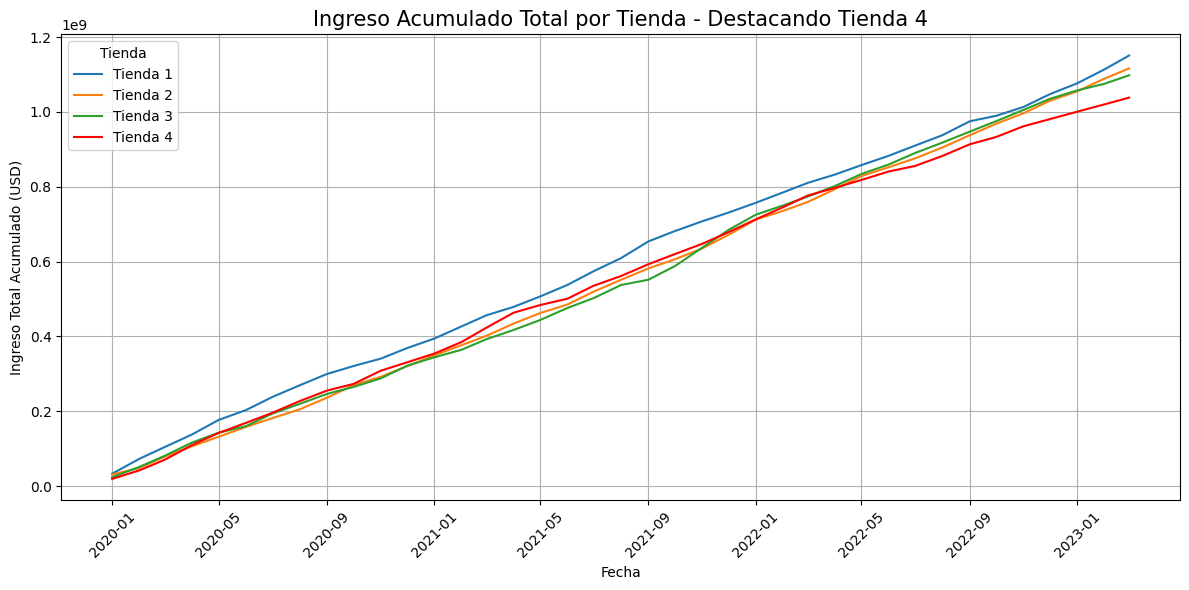

In [75]:
# 1. Asumimos que ventas_mensuales ya fue calculado y preparado (ahora se calcula en la celda anterior)
# 2. Definimos la paleta de colores para destacar la Tienda 4
color_map = {'Tienda 1': '#1f77b4', 'Tienda 2': '#ff7f0e', 'Tienda 3': '#2ca02c', 'Tienda 4': 'red'}

plt.figure(figsize=(12, 6))

# Corrected to use 'Tienda' column, as defined in ventas_mensuales
for tienda in ventas_mensuales['Tienda'].unique():
    data_tienda = ventas_mensuales[ventas_mensuales['Tienda'] == tienda].copy()
    data_tienda['Ingreso_Acumulado'] = data_tienda['Ingresos_Mensuales'].cumsum()

    # Graficamos, usando el color específico para la tienda
    sns.lineplot(data=data_tienda, x=data_tienda.index, y='Ingreso_Acumulado',
                 label=tienda, marker='', color=color_map[tienda])

plt.title('Ingreso Acumulado Total por Tienda - Destacando Tienda 4', fontsize=15)
plt.ylabel('Ingreso Total Acumulado (USD)')
plt.xlabel('Fecha')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()